In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [12]:
from sklearn import svm
from scipy import io as spio
import numpy as np
import HW01_utils as utils
import trainfunctions as tf

In [26]:
_LOCAL_PATH = r"C:\Users\Mitch\Documents\Cal\2 - 2017 Spring\COMPSCI 289A - Intro to Machine Learning\HW01"
_DATA_PATH = "Data\hw01_data"

_DATA_DIR = _LOCAL_PATH + "\\" + _DATA_PATH
trainpath = r"cifar\train.mat"

In [8]:
valsetsize = 5000
samples = np.array([100, 200, 500, 1000, 2000, 5000])
hyperparams = np.logspace(-8,4,num=20)

In [9]:
# Load CIFAR-10 training data
cifardata = spio.loadmat(_DATA_DIR+'\\'+trainpath)
cifar = cifardata['trainX']

In [10]:
# Shuffle data before splitting
np.random.shuffle(cifar)

In [13]:
trainset,valset = utils.partition(valsetsize,cifar)
trainsetarrays,trainsetlabels = utils.separatelabels(trainset)
valsetarrays,valsetlabels = utils.separatelabels(valset)

In [14]:
Accs = np.empty((len(samples),len(hyperparams)))
i = 0 # sample index counter
for nsamples in samples:
    print(nsamples,'samples')
    j = 0 # hyperparameter index counter
    for hp in hyperparams:
        acc = tf.TrainAndScoreNsamples(trainsetarrays[:nsamples],trainsetlabels[:nsamples],valsetarrays,valsetlabels,hp)
        print('\tC =',hp,'\tAccuracy:',acc)
        Accs[i,j] = acc
        j+=1
    i+=1
print(Accs)

100 samples
	C = 1e-08 	Accuracy: 0.111
	C = 4.28133239872e-08 	Accuracy: 0.1658
	C = 1.83298071083e-07 	Accuracy: 0.1834
	C = 7.84759970351e-07 	Accuracy: 0.1838
	C = 3.35981828628e-06 	Accuracy: 0.1826
	C = 1.43844988829e-05 	Accuracy: 0.1826
	C = 6.15848211066e-05 	Accuracy: 0.1826
	C = 0.000263665089873 	Accuracy: 0.1826
	C = 0.00112883789168 	Accuracy: 0.1826
	C = 0.00483293023857 	Accuracy: 0.1826
	C = 0.0206913808111 	Accuracy: 0.1826
	C = 0.088586679041 	Accuracy: 0.1826
	C = 0.379269019073 	Accuracy: 0.1826
	C = 1.62377673919 	Accuracy: 0.1826
	C = 6.95192796178 	Accuracy: 0.1826
	C = 29.7635144163 	Accuracy: 0.1826
	C = 127.42749857 	Accuracy: 0.1826
	C = 545.559478117 	Accuracy: 0.1826
	C = 2335.72146909 	Accuracy: 0.1826
	C = 10000.0 	Accuracy: 0.1826
200 samples
	C = 1e-08 	Accuracy: 0.1026
	C = 4.28133239872e-08 	Accuracy: 0.2272
	C = 1.83298071083e-07 	Accuracy: 0.2622
	C = 7.84759970351e-07 	Accuracy: 0.2466
	C = 3.35981828628e-06 	Accuracy: 0.2466
	C = 1.43844988829e-0

In [15]:
# Find the index of the maximum value in the accuracies table
maxindex = np.array([int(len(Accs)*np.argmax(Accs)/(len(Accs.flatten()))),np.argmax(Accs)%len(Accs[0])])
print('The index of the maximum accuracy ('+str(Accs[maxindex[0],maxindex[1]])+') is:',maxindex)

besthp = hyperparams[maxindex[1]]
bestns = samples[maxindex[0]]
# Determine which sample count-hyperparameter combination this corresponds to
print('This corresponds to a hyperparameter of C = '+ str(besthp) + ' when training on ' + str(bestns) + ' samples.')


The index of the maximum accuracy (0.3752) is: [5 2]
This corresponds to a hyperparameter of C = 1.83298071083e-07 when training on 5000 samples.


In [16]:
from matplotlib import pyplot as plt

In [17]:
hpC1 = 13

In [18]:
errors = np.ones_like(Accs[:,hpC1])-Accs[:,hpC1]

In [39]:
fig = plt.figure()
plt.plot(samples,errors)
plt.title('Error on Datasets of Varying Size')
plt.xlabel('# Training Samples')
plt.ylabel('Error')
plt.text(4000,0.80,'C = '+str(round(hyperparams[hpC1],4)))

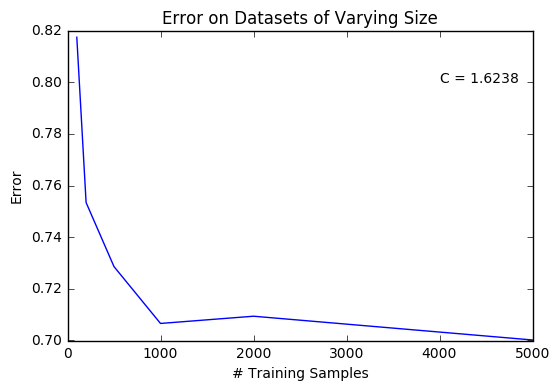

In [41]:
plt.show()

In [40]:
plt.savefig(_LOCAL_PATH+r'\Figures\CIFAR10_SampleAcc.jpg')

C:\Users\Mitch\Documents\Cal\2 - 2017 Spring\COMPSCI 289A - Intro to Machine Learning\HW01


In [43]:
# Export data to csv files for report
np.savetxt(_LOCAL_PATH+r'\CIFAR_Accuracies.csv',Accs,fmt='%f',delimiter=',',comments='')
np.savetxt(_LOCAL_PATH+r'\CIFAR_hyperparams.csv',hyperparams,fmt='%.8f',delimiter=',',comments='')